In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Ali\Documents\python\applications(2.0).csv")

In [5]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [7]:
df.shape

(13315, 10)

In [9]:
df.columns

Index(['Applied at', 'Amount', 'Age', 'Gender', 'Industry', 'Marital status',
       'External Rating', 'Education level', 'Location', 'applicant_id'],
      dtype='object')

### applicant_id sütunundaki tekrar eden değerleri kaldırın.

In [12]:
# Remove duplicate values based on 'applicant_id' column
df = df.drop_duplicates(subset='applicant_id')

In [14]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [16]:
df.shape

(13278, 10)

### 'External Rating' alanındaki eksik değerleri sıfırla doldurun.

In [19]:
df['External Rating'] = df['External Rating'].fillna(0)

### 'Education level' alanındaki eksik değerleri "Ortaokul" metni ile doldurun.

In [22]:
df['Education level'] = df['Education level'].fillna('Ortaokul')

In [24]:
industries = pd.read_csv(r"C:\Users\Ali\Documents\python\industries(2.0).csv")

In [26]:
industries.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [28]:
industries = industries.rename(columns={'Score': 'Industry Score'})
industries.head()

,Industry,Industry Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [30]:
df = pd.merge(df, industries)

In [32]:
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0
2,11.30.2022 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0
3,11.30.2022 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0
4,11.30.2022 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0


In [34]:
#Convert application timestamp to datetime
df['Applied at'] = pd.to_datetime(df['Applied at'], format='%m.%d.%Y %H:%M:%S', errors='coerce')
#Extract day of the week
df['Applied on day'] = df['Applied at'].dt.day_name()
#Adds a column with the name of the day (e.g. 'Monday', 'Wednesday') of the application date.
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday


In [36]:
#Converts age to integer type (ensures no NaNs or float issues)
df['Age'] = df['Age'].astype(int)

In [38]:
#If applied on a weekday, score +20. If weekend, score is 0.
#Başvuru hafta sonu yapılmamışsa, puana 20 puan eklenir.
day = ~df['Applied on day'].isin(['Saturday', 'Sunday'])*20 
#Age between 35–55: score +20.
#Başvuranın yaşı 35 ile 55 arasındaysa, puana 20 puan eklenir.
age = ((df['Age'] >= 35) & (df['Age'] <= 55)) * 20
#Married: score +20.
#Başvuran evliyse, puana 20 puan eklenir.
marital = (df['Marital status'] == 'Married') * 20
#Lives in Kyiv region: score +10.
#Başvuran Kiev veya çevresinde bulunuyorsa, puana 10 puan eklenir.
location = (df['Location'] == 'Київ чи область') * 10
#Uses the numeric score from the Industry merge.
industry = df['Industry Score']
#Good rating (7 or above): score +20.
#'External Rating' 7 veya daha büyükse, puana 20 puan eklenir.
positive_rating = (df['External Rating'] >= 7) * 20
#Bad rating (2 or less): penalty -20.
#'External Rating' 2 veya daha küçükse, puandan 20 puan çıkarılır.
negative_rating = (df['External Rating'] <= 2) * -20



#Sums up all the individual partial scores for a total score per applicant.
df['Final score'] = day + age + marital + location + industry + positive_rating + negative_rating
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday,0
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,50
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,70
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,70
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN,30
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN,10
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday,10


In [40]:
df['Final score'] = df['Final score'] * ~(df['External Rating'] == 0) * ~df['Amount'].isna()
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
1,2022-11-30 10:30:00,NaN,22,Чоловік,Blockchain,Single,2.0,Ще студент вишу,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,Wednesday,0
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,50
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,70
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,70
13274,NaT,6000.0,30,Чоловік,Robotics,Married,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,825f8a8e84b5c3e810b9d8e3554dafd8,10,NaN,0
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN,10
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday,10


In [42]:
df = df[df['Final score'] > 0]
df

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Industry Score,Applied on day,Final score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,40
2,2022-11-30 10:36:59,30000.0,29,Чоловік,Blockchain,Single,7.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,d85404bd5576f05b711ad56cad428463,0,Wednesday,50
3,2022-11-30 10:44:28,16050.0,50,Чоловік,Blockchain,Other,15.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,667563fc9922d71c7c2bfa8e9fba9fbc,0,Wednesday,70
4,2022-11-30 10:46:30,8550.0,40,Чоловік,Blockchain,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,056d0a80808828a4d4017224fd17491e,0,Wednesday,40
5,2022-11-30 10:48:36,8400.0,27,Чоловік,Blockchain,Married,6.0,"Вища (бакалавр, спеціаліст, магістр)",Черкаси чи область,56f735f424804136be23a2c0cce2ac65,0,Wednesday,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,NaT,7500.0,21,Жінка,Robotics,Married,2.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,c64cbee3c732b41ed109b9f7f3c6252c,10,NaN,40
13273,NaT,14403.0,34,Чоловік,Robotics,Married,13.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,3ed663a677fa53827d49322ef876cd7e,10,NaN,70
13275,NaT,900.0,18,Чоловік,Robotics,Other,1.0,Ще студент вишу,NaN,5acbd543198ee9c454813d89ee1f670d,10,NaN,10
13276,2022-12-14 11:13:46,3900.0,27,Жінка,Robotics,Single,1.0,"Вища (бакалавр, спеціаліст, магістр)",Одеса чи область,cd75c270d6f313368e1f5437de19dfa9,10,Wednesday,10


In [44]:
dfg = df.set_index('Applied at')
dfg = dfg.resample('W', label='left').mean(numeric_only=True)
dfg = dfg.fillna(0).astype(int)
print(dfg['Final score'])

Applied at
2022-11-27    53
2022-12-04     0
2022-12-11    48
2022-12-18    47
2022-12-25    51
Name: Final score, dtype: int32


<Axes: xlabel='Applied at', ylabel='Final score'>

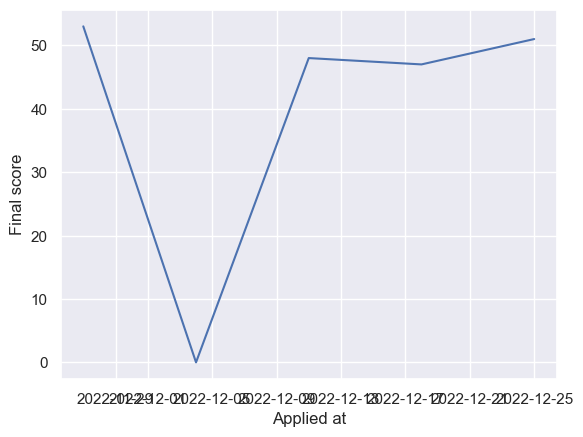

In [46]:
sns.set_theme()
sns.lineplot(data=dfg, x='Applied at', y='Final score')

In [48]:
import matplotlib.pyplot as plt# Create the lineplot

<Axes: xlabel='Applied at', ylabel='Final score'>

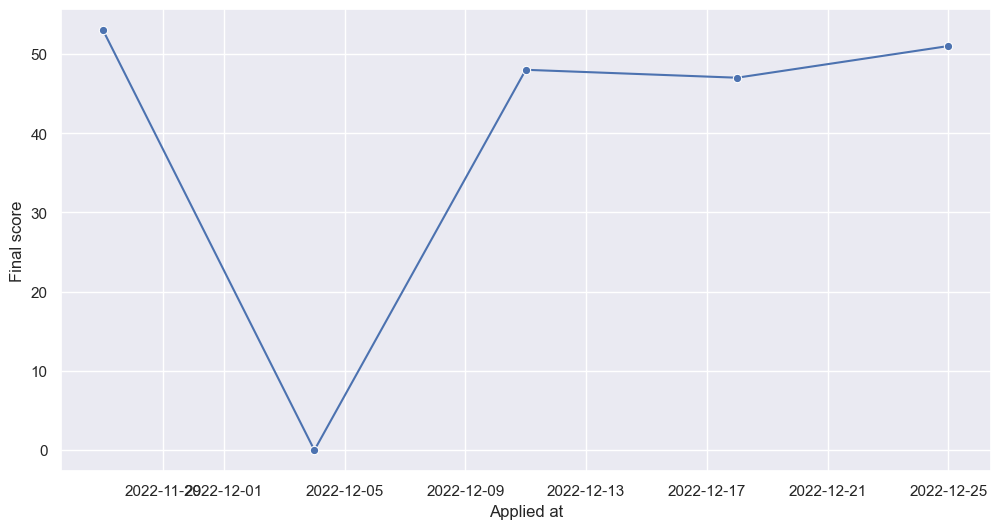

In [50]:
plt.figure(figsize=(12, 6))  # Set a larger figure size for better spacing
sns.lineplot(data=dfg, x='Applied at', y='Final score', marker='o')